In [221]:
import pandas as pd

In [222]:
train = pd.read_csv('titanic_train.csv')
# train
test  = pd.read_csv('test.csv')
data  = pd.concat((train, test), axis = 0)
data.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [224]:
# 缺失项处理（info()中看到Age cabin Embarked 有缺失）
data['Age'] = data['Age'].fillna(data['Age'].median())
data.loc[data["Sex"] == 'male','Sex' ] = 0
data.loc[data["Sex"] == 'female', 'Sex'] =1

# print(data['Embarked'].unique())
# print(data['Embarked'].value_counts().argmax())
# # .argmax() 和idxmax()用于获得series最大值的索引值
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().idxmax())
# data.loc[data['Embarked']=='S','Embarked'] = 0

data['Embarked'].replace('S',0, inplace = True)
data['Embarked'].replace('C',1, inplace = True)
data['Embarked'].replace('Q',2, inplace = True)

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int64
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 132.9+ KB


### 决策树预测

In [226]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [227]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# data[1:891][predictors]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[1:891][predictors],data[1:891]['Survived'],test_size=0.3)
# Xtrain.shape
# Xtest.shape
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.7827715355805244

In [228]:
import graphviz
from sklearn.tree import export_graphviz

In [229]:
feature_name = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
dot_data = export_graphviz(clf
                            ,feature_names = feature_name#标注按什么特征分类
                            ,class_names = ['存活','死亡']#标注分类结果类别
                            ,filled = True#填充颜色 ，深浅表示纯度
                            ,rounded = True)#方形或弧形
graph = graphviz.Source(dot_data)
graph.render('TaitanicTree1')
# graph

'TaitanicTree1.pdf'

In [230]:
# 特征重要性程度 
clf.feature_importances_
[*zip(feature_name, clf.feature_importances_)]

[('Pclass', 0.0975959860273827),
 ('Sex', 0.24673444942813774),
 ('Age', 0.30279835186653614),
 ('SibSp', 0.020909757904811692),
 ('Parch', 0.025442191066100035),
 ('Fare', 0.2865463543065443),
 ('Embarked', 0.019972909400487293)]

In [308]:
# predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
# # data[1:891][predictors]
# Xtrain, Xtest, Ytrain, Ytest = train_test_split(data[1:891][predictors],data[1:891]['Survived'],test_size = 0.3)
clf2 = DecisionTreeClassifier(criterion = 'entropy'
                              ,random_state = 30
                              ,splitter = 'random'
                              ,max_depth = 5
                             )
clf2.fit(Xtrain, Ytrain)
score = clf2.score(Xtest, Ytest)
score

0.8239700374531835

In [302]:
import matplotlib.pyplot as plt

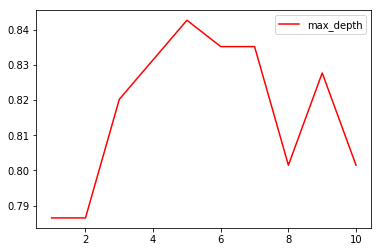

In [319]:
# 探索最优的max_depth
test = []
for i in range(10):
    clf = DecisionTreeClassifier(criterion = 'entropy'
                                ,random_state = 30
                                ,splitter ='random'
                                ,max_depth = i+1)
    clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
    
plt.plot(range(1,11),test,color='red',label = 'max_depth')
plt.legend()# 设置图例的显示位置 默认 ‘best'
plt.show()